In [1]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
import scipy.io

from numpy import loadtxt

Populating the interactive namespace from numpy and matplotlib


In [2]:
lines = loadtxt("/g/data1/v45/pas561/ASF_review_fig/for_Spence/ElNino_SLA.xyz", comments="#", delimiter="\t", unpack=False)
print lines
print lines.shape

en_sla_x=lines[:,0]
en_sla_y=lines[:,1]
en_sla=lines[:,2]

en_sla2d=np.reshape(en_sla,(215,205))
print en_sla2d.shape
print en_sla2d[0,:]
print en_sla2d[:,0]

[[ -4.47500000e+03   5.72500000e+03              nan]
 [ -4.42500000e+03   5.72500000e+03              nan]
 [ -4.37500000e+03   5.72500000e+03   3.24563599e+00]
 ..., 
 [  5.62500000e+03  -4.97500000e+03              nan]
 [  5.67500000e+03  -4.97500000e+03              nan]
 [  5.72500000e+03  -4.97500000e+03              nan]]
(44075, 3)
(215, 205)
[        nan         nan  3.24563599         nan         nan  2.17438507
  1.98309326  1.97379303  2.04042053  2.12130737  2.24599457  2.39408112
  2.43761444  2.24993896  1.82404327  1.27363586  0.77671051  0.4887619
  0.47927094  0.72653961         nan  1.42410278  1.61358643  1.73683167
  1.86072922  2.00550842  2.19911194  2.46162033  2.73894119  2.95840454
  3.15244675  3.45560455  3.89870834  4.29524231  4.40581131  4.16319656
  3.68141937  3.10822296  2.54762268  2.07170105  1.66838837         nan
         nan -0.32129288 -1.03875732 -1.47864532 -1.6905365  -1.82446289
 -1.95106888 -2.02410507 -1.97327423 -1.75500488 -1.3175354  -0

In [3]:
lines = loadtxt("/g/data1/v45/pas561/ASF_review_fig/for_Spence/ElNino_SLP.xyz", comments="#", delimiter="\t", unpack=False)
print lines
print lines.shape

en_slp_x=lines[:,0]
en_slp_y=lines[:,1]
en_slp=lines[:,2]

en_slp2d=np.reshape(en_slp,(215,205))
print en_slp2d.shape
print en_slp2d[0,:]
print en_slp2d[:,0]

[[ -4.47500000e+03   5.72500000e+03              nan]
 [ -4.42500000e+03   5.72500000e+03              nan]
 [ -4.37500000e+03   5.72500000e+03   9.00472924e-02]
 ..., 
 [  5.62500000e+03  -4.97500000e+03   1.23834932e+00]
 [  5.67500000e+03  -4.97500000e+03   1.23524916e+00]
 [  5.72500000e+03  -4.97500000e+03              nan]]
(44075, 3)
(215, 205)
[        nan         nan  0.09004729         nan         nan         nan
  0.23988414         nan  0.30793604  0.32967076         nan         nan
         nan  0.4297435          nan         nan         nan  0.499962
         nan         nan         nan  0.54394555         nan         nan
         nan  0.57270813         nan         nan         nan  0.58169287
         nan         nan  0.58376151  0.5846324          nan  0.57496756
  0.56871372  0.56485683         nan  0.54651141         nan         nan
  0.52167141         nan  0.48632824         nan         nan  0.44916683
         nan  0.4150857          nan         nan         nan    

In [4]:
lines = loadtxt("/g/data1/v45/pas561/ASF_review_fig/for_Spence/SAM_SLA_pos.xyz", comments="#", delimiter=" ", unpack=False)
print lines
print lines.shape

sam_sla_x=lines[:,0]
sam_sla_y=lines[:,1]
sam_sla=lines[:,2]

sam_sla2d=np.reshape(sam_sla,(215,205))
print sam_sla2d.shape
print sam_sla2d[0,:]
print sam_sla2d[:,0]

[[ -4.47500000e+03   5.72500000e+03              nan]
 [ -4.42500000e+03   5.72500000e+03   1.56800000e+00]
 [ -4.37500000e+03   5.72500000e+03   7.43000000e-01]
 ..., 
 [  5.62500000e+03  -4.97500000e+03              nan]
 [  5.67500000e+03  -4.97500000e+03              nan]
 [  5.72500000e+03  -4.97500000e+03              nan]]
(44075, 3)
(215, 205)
[             nan   1.56800000e+00   7.43000000e-01   7.80000000e-01
   3.87000000e-01   5.46000000e-01   6.44000000e-01   7.12000000e-01
   7.80000000e-01   8.31000000e-01   8.59000000e-01   9.39000000e-01
   9.89000000e-01   1.07300000e+00   1.09000000e+00   9.38000000e-01
   6.36000000e-01   3.96000000e-01   2.85000000e-01   2.73000000e-01
   4.46000000e-01   6.15000000e-01   1.18400000e+00   1.17500000e+00
   1.06100000e+00   9.99000000e-01   9.19000000e-01   7.22000000e-01
   9.24000000e-01   8.17000000e-01   7.62000000e-01   6.54000000e-01
   7.63000000e-01   8.51000000e-01   9.60000000e-01   1.06100000e+00
   1.12800000e+00   1.144

In [5]:
lines = loadtxt("/g/data1/v45/pas561/ASF_review_fig/for_Spence/SAM_SLP_pos.xyz", comments="#", delimiter="\t", unpack=False)
print lines
print lines.shape

sam_slp_x=lines[:,0]
sam_slp_y=lines[:,1]
sam_slp=lines[:,2]

sam_slp2d=np.reshape(sam_slp,(215,205))
print sam_slp2d.shape
print sam_slp2d[0,:]
print sam_slp2d[:,0]

[[ -4.47500000e+03   5.72500000e+03              nan]
 [ -4.42500000e+03   5.72500000e+03              nan]
 [ -4.37500000e+03   5.72500000e+03  -3.28661278e-02]
 ..., 
 [  5.62500000e+03  -4.97500000e+03   5.43155134e-01]
 [  5.67500000e+03  -4.97500000e+03   5.33551574e-01]
 [  5.72500000e+03  -4.97500000e+03              nan]]
(44075, 3)
(215, 205)
[        nan         nan -0.03286613         nan         nan         nan
  0.00541262         nan  0.02720861  0.03551216         nan         nan
         nan  0.10102275         nan         nan         nan  0.19778526
         nan         nan         nan  0.30638182         nan         nan
         nan  0.4179287          nan         nan         nan  0.53253168
         nan         nan  0.61416262  0.62739211         nan  0.68082058
  0.7127158   0.73720211         nan  0.7889061          nan         nan
  0.8637048          nan  0.92221606         nan         nan  0.99818152
         nan  1.05768406         nan         nan         nan  

In [6]:
lines = loadtxt("/g/data1/v45/pas561/ASF_review_fig/for_Spence/XY_lonlat.xy", comments="#", delimiter=" ", unpack=False)
print lines
print lines.shape

x=lines[:,0]
y=lines[:,1]
lon=lines[:,2]
lat=lines[:,3]

lon2d=np.reshape(lon,(215,205))
print lon2d.shape
print lon2d[0,:]
print lon2d[:,0]

lat2d=np.reshape(lat,(215,205))
print lat2d.shape
print lat2d[0,:]
print lat2d[:,0]


[[-4475.      5725.       -38.0133   -29.1417]
 [-4425.      5725.       -37.7014   -29.3543]
 [-4375.      5725.       -37.3868   -29.5659]
 ..., 
 [ 5625.     -4975.       131.491    -27.4741]
 [ 5675.     -4975.       131.239    -27.219 ]
 [ 5725.     -4975.       130.99     -26.9637]]
(44075, 4)
(215, 205)
[-38.0133   -37.7014   -37.3868   -37.0695   -36.7496   -36.427    -36.1017
 -35.7737   -35.4429   -35.1094   -34.7731   -34.4341   -34.0923   -33.7478
 -33.4004   -33.0502   -32.6973   -32.3415   -31.9829   -31.6215   -31.2572
 -30.8901   -30.5202   -30.1474   -29.7718   -29.3934   -29.0121   -28.628
 -28.241    -27.8513   -27.4587   -27.0633   -26.665    -26.264    -25.8602
 -25.4536   -25.0443   -24.6322   -24.2173   -23.7998   -23.3795   -22.9566
 -22.531    -22.1027   -21.6719   -21.2384   -20.8024   -20.3639   -19.9228
 -19.4793   -19.0333   -18.5849   -18.1342   -17.6811   -17.2257   -16.7681
 -16.3082   -15.8462   -15.3821   -14.9158   -14.4476   -13.9774   -13.5052
 -13.

In [7]:
print np.nanmax(sam_sla)
print np.nanmin(sam_sla)

print np.nanmax(sam_slp)
print np.nanmin(sam_slp)


print lon.size
print lat.size
print sam_sla.size

print np.max(lat)
print np.min(lat)

print np.max(lon)
print np.min(lon)



8.465
-10.779
2.6123290062
-5.46536111832
44075
44075
44075
-23.5624
-89.6736
179.712
-179.712


[-3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6
 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1
  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3. ]
[-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.]


/g/data3/hh5/public/apps/miniconda3/envs/analysis27-18.04/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


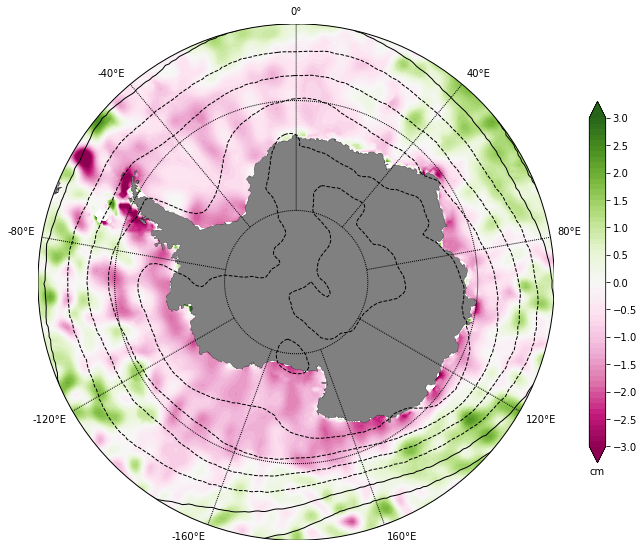

In [8]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

#clev = np.arange(-3.1,3.1,.1)
clev = np.linspace(-3,3,61)
print clev

clev3 = np.linspace(-6,3,10)
print clev3


#plt.subplot(1,2,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(lon2d,lat2d)
X.shape
p1=map.contourf(X,Y,sam_sla2d, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm')


ticks=[-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3]
cb.set_ticks(ticks)

map.contour(X,Y,sam_slp2d,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')


[-6.  -5.8 -5.6 -5.4 -5.2 -5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2
 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2
  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8
  6. ]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.
   5.   6.   7.   8.   9.  10.]
[-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]


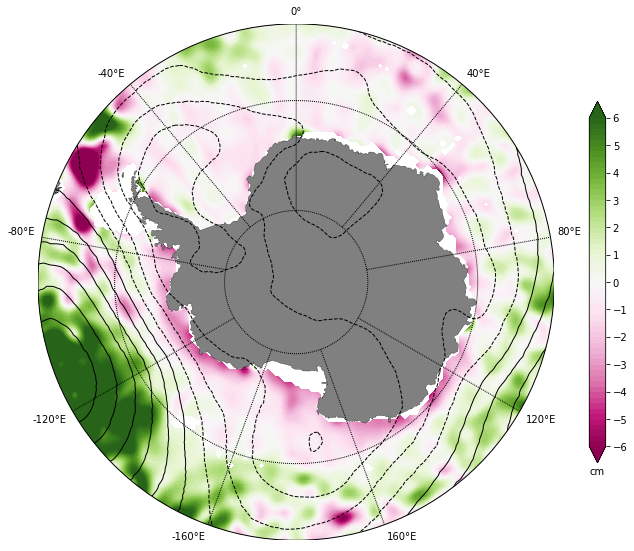

In [9]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

#clev = np.arange(-3.1,3.1,.1)
clev = np.linspace(-6,6,61)
print clev

clev3 = np.linspace(-10,10,21)
print clev3


#plt.subplot(1,2,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(lon2d,lat2d)
X.shape
p1=map.contourf(X,Y,en_sla2d, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm')

ticks=np.linspace(-6,6,13)
print ticks
cb.set_ticks(ticks)

map.contour(X,Y,en_slp2d,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')

In [121]:
cmip_lat=np.load('/g/data1a/v45/pas561/ASF_review_fig/MMM/lat_unique.npy')
cmip_lon=np.load('/g/data1a/v45/pas561/ASF_review_fig/MMM/lon_unique.npy')
cmip_lev=np.load('/g/data1a/v45/pas561/ASF_review_fig/MMM/lev_unique.npy')
thetao_rcp85=np.load('/g/data1a/v45/pas561/ASF_review_fig/MMM/thetao_rcp85.npy')
thetao_hist=np.load('/g/data1a/v45/pas561/ASF_review_fig/MMM/thetao_hist.npy')
thetao_rcp85_diff_hist=np.load('/g/data1a/v45/pas561/ASF_review_fig/MMM/thetao_rcp85-hist.npy')


print cmip_lat.shape
print cmip_lon.shape
print cmip_lev.shape
print thetao_rcp85.shape
print thetao_hist.shape
print thetao_rcp85_diff_hist.shape

(60,)
(360,)
(44,)
(60, 360, 44)
(60, 360, 44)
(60, 360, 44)


In [137]:
slp_rcp85=np.load('/g/data1a/v45/pas561/ASF_review_fig/MMM/psl_rcp85.npy')
slp_hist=np.load('/g/data1a/v45/pas561/ASF_review_fig/MMM/psl_hist.npy')
slp_rcp85_diff_hist=np.load('/g/data1a/v45/pas561/ASF_review_fig/MMM/psl_rcp85-hist.npy')

print slp_rcp85.shape
print slp_hist.shape
print slp_rcp85_diff_hist.shape

(60, 360)
(60, 360)
(60, 360)


In [138]:
print cmip_lev[24:30:]
#print thetao_hist[0,:,0]

[  975.  1125.  1300.  1525.  1775.  2025.]


In [139]:
print cmip_lon

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [153]:
print 't1', thetao_hist[:,0,24]
print 't2', thetao_hist[:,-1,24]
print thetao_hist.shape
thetao_hist[:,0,24]=thetao_hist[:,-1,24]

thetao_hist_2=np.zeros((size(thetao_hist,0),size(thetao_hist,1)+1,size(thetao_hist,2)))
thetao_hist_2[:,0:360,:]=thetao_hist[:,:,:]
thetao_hist_2[:,360,:]=thetao_hist[:,-1,:]
print thetao_hist.shape
print 't1', thetao_hist_2[:,0,24]
print 't2', thetao_hist_2[:,-1,24]

thetao_rcp85_diff_hist
thetao_rcp85_diff_hist_2=np.zeros((size(thetao_hist,0),size(thetao_hist,1)+1,size(thetao_hist,2)))
thetao_rcp85_diff_hist_2[:,0:360,:]=thetao_rcp85_diff_hist[:,:,:]
thetao_rcp85_diff_hist_2[:,360,:]=thetao_rcp85_diff_hist[:,-1,:]
print thetao_rcp85_diff_hist.shape

#note different nan line index
print 's1', slp_rcp85_diff_hist[:,0]
print 's2', slp_rcp85_diff_hist[:,1]
print 's3', slp_rcp85_diff_hist[:,-1]

slp_rcp85_diff_hist[:,0]=slp_rcp85_diff_hist[:,3]
slp_rcp85_diff_hist[:,1]=slp_rcp85_diff_hist[:,3]
slp_rcp85_diff_hist[:,-1]=slp_rcp85_diff_hist[:,3]
slp_rcp85_diff_hist[:,-2]=slp_rcp85_diff_hist[:,3]
slp_rcp85_diff_hist[:,-3]=slp_rcp85_diff_hist[:,3]
slp_rcp85_diff_hist_2=np.zeros((size(slp_hist,0),size(slp_hist,1)+1))
slp_rcp85_diff_hist_2[:,0:360]=slp_rcp85_diff_hist[:,:]
slp_rcp85_diff_hist_2[:,360]=slp_rcp85_diff_hist[:,-1]

#cmip_lon_2=[cmip_lon[:], 360]
#print cmip_lon_2                    
cmip_lon_2=np.zeros((361,)) 
print cmip_lon_2.shape
print cmip_lon.shape
cmip_lon_2[0:360]=cmip_lon
cmip_lon_2[360]=cmip_lon[0]

t1 [          nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan  273.83062707  273.68056214  273.60405349  273.52975009
  273.45996842  273.44089039  273.44841573  273.45970355  273.46855799
  273.51726387  273.58184327  273.65119281  273.80554797  273.97584744
  274.1189186   274.24106864  274.43288781  274.72241094  275.03787089
  275.41756462  275.78708376  276.13335909  276.39026507  276.63624554
  276.89369342  277.13487954  277.15338318  277.32530161  277.66992836
  277.83744316  277.95674979  278.00580735  278.03562556  278.05357763
  278.05837113  278.06812981  278.07903676  278.09325981           nan]
t2 [          nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan

here3 [-4. -3. -2. -1.  0.  1.  2.  3.]


<a list of 9 text.Text objects>

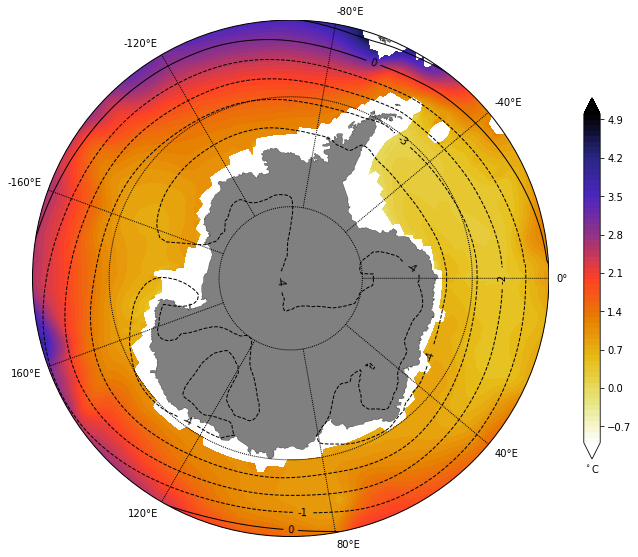

In [154]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

clev = np.arange(-1,5.1,.1)

plt.subplot(1,1,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon_2,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,thetao_hist_2[:,:,24]-273.13, cmap=plt.cm.CMRmap_r, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$^\circ$C')

clev3 = np.linspace(-10,10,21)
cs=map.contour(X,Y,slp_rcp85_diff_hist_2[:,:]/100,levels=clev3,colors='k',linewidths=1)
print 'here3', cs.levels
plt.clabel(cs,cs.levels[0:5], fmt="%1.0f", fontsize=10)

#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')


Text(0.5,0,'$^\\circ$C')

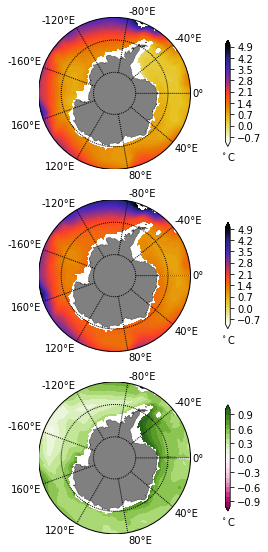

In [130]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

clev = np.arange(-1,5.1,.1)

plt.subplot(3,1,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon_2,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,thetao_hist_2[:,:,24]-273.13, cmap=plt.cm.CMRmap_r, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$^\circ$C')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')

plt.subplot(3,1,2)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,thetao_rcp85[:,:,24]-273.13, cmap=plt.cm.CMRmap_r, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$^\circ$C')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')

clev = np.arange(-1,1.1,.1)

plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon_2,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,thetao_rcp85_diff_hist_2[:,:,24], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$^\circ$C')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')


Text(0.5,0,'$^\\circ$C')

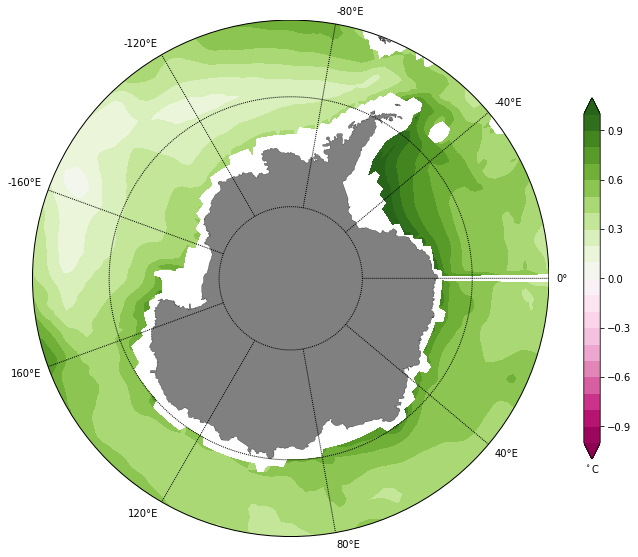

In [87]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

clev = np.arange(-1,1.1,.1)

#plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,thetao_rcp85_diff_hist[:,:,24], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$^\circ$C')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')


Text(0.5,0,'mbar')

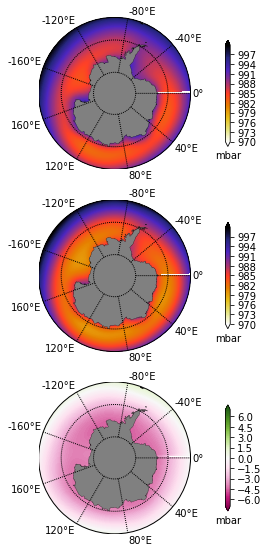

In [16]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

#clev = np.arange(96000,100000,10)
clev = np.arange(970,1000,.1)

plt.subplot(3,1,1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,slp_hist[:,:]/100, cmap=plt.cm.CMRmap_r, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('mbar')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')

plt.subplot(3,1,2)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,slp_rcp85[:,:]/100, cmap=plt.cm.CMRmap_r, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('mbar')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')

clev = np.arange(-7,7.10,.10)

plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,slp_rcp85_diff_hist[:,:]/100, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('mbar')
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')


[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.
   5.   6.   7.   8.   9.  10.]


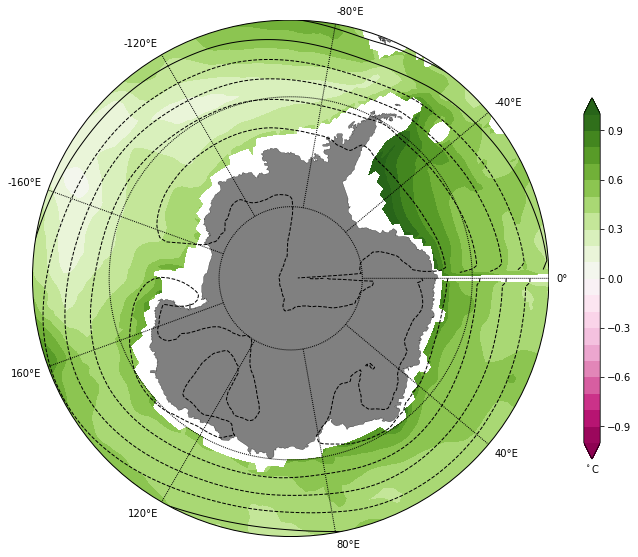

In [17]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

clev = np.arange(-1,1.1,.1)
clev3 = np.linspace(-10,10,21)
print clev3

#plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,thetao_rcp85_diff_hist[:,:,24], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$^\circ$C')
map.contour(X,Y,slp_rcp85_diff_hist[:,:]/100,levels=clev3,colors='k',linewidths=1)
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')


[-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]


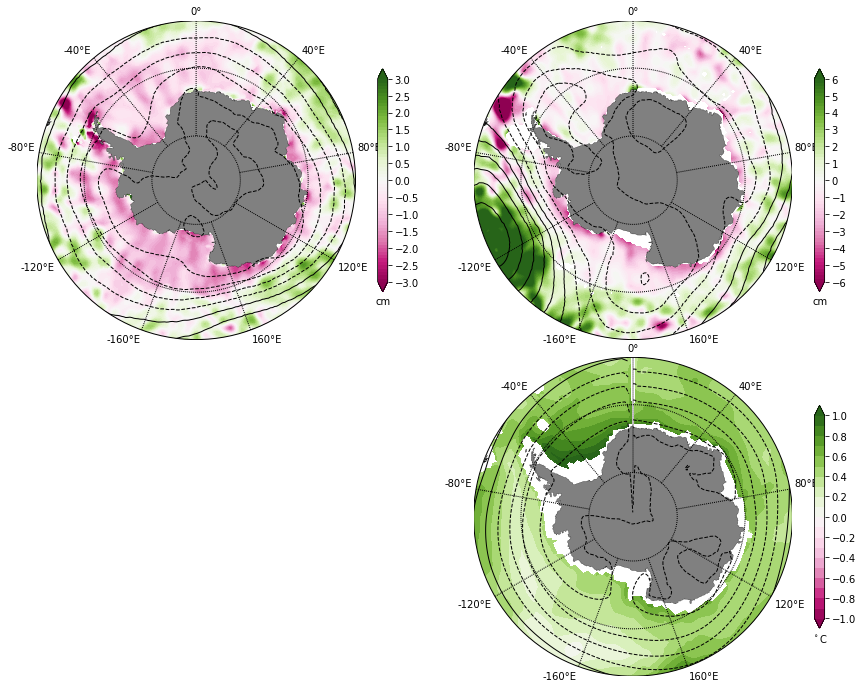

In [18]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

plt.subplot(2,2,1)
#clev = np.arange(-3.1,3.1,.1)
clev = np.linspace(-3,3,61)
#print clev
clev3 = np.linspace(-6,3,10)
#print clev3
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(lon2d,lat2d)
X.shape
p1=map.contourf(X,Y,sam_sla2d, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm')
ticks=[-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3]
cb.set_ticks(ticks)
map.contour(X,Y,sam_slp2d,levels=clev3,colors='k',linewidths=1)
#plt.title('SAM Anomaly')

plt.subplot(2,2,2)
clev = np.linspace(-6,6,61)
#print clev
clev3 = np.linspace(-10,10,21)
#print clev3
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(lon2d,lat2d)
X.shape
p1=map.contourf(X,Y,en_sla2d, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm')
ticks=np.linspace(-6,6,13)
print ticks
cb.set_ticks(ticks)
map.contour(X,Y,en_slp2d,levels=clev3,colors='k',linewidths=1)
#plt.title('El Nino Anomaly')

plt.subplot(2,2,4)
clev = np.arange(-1,1.1,.1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,thetao_rcp85_diff_hist[:,:,24], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$^\circ$C')
ticks=np.linspace(-1,1,11)
print ticks
cb.set_ticks(ticks)
clev3 = np.linspace(-10,10,21)
map.contour(X,Y,slp_rcp85_diff_hist[:,:]/100,levels=clev3,colors='k',linewidths=1)
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('CMIP5 1000 m Temp Anomaly')

plt.tight_layout()

of = os.path.join('/g/data1a/v45/pas561/ASF_review_fig/','section4_fig.png')
plt.savefig(of,dpi=220)

         IceShelf  Longitude  Latitude            x            y  \
0       Ross-WAIS   -164.875   -76.625  -380845.931 -1409033.020   
1         Withrow   -155.700   -75.300  -660750.507 -1463400.157   
2            Getz   -129.375   -71.875 -1534619.427 -1259429.616   
3          Dotson   -120.675   -71.200 -1772142.712 -1051175.765   
4         Crosson   -112.000   -71.800 -1848433.178  -746815.481   
5        Thwaites   -104.000   -70.400 -2085904.713  -520074.456   
6     Pine Island   -101.625   -77.625 -1321930.042  -271954.426   
7           Abbot    -97.000   -70.125 -2164256.535  -265737.288   
8         Venable    -90.600   -70.125 -2180390.165   -22833.827   
9          Stange    -84.000   -71.625 -2002058.722   210424.851   
10           Bach    -79.675   -70.400 -2114950.577   385305.035   
11        Wilkins    -77.000   -68.350 -2318600.020   535290.993   
12      George VI    -70.875   -67.200 -2370679.893   822080.132   
13       Larsen B    -56.000   -65.875 -2204495.

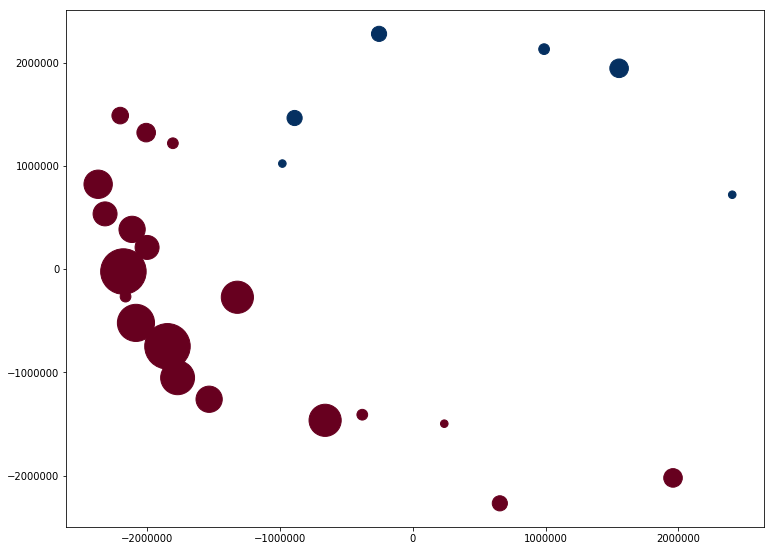

In [19]:
import pandas as pd

df = pd.read_csv('/g/data1a/v45/pas561/ASF_review_fig/circles_ishelf.csv')

ice_x = df['x'].values
ice_y = df['y'].values

#lon is from -180 +180 ... change to 0-360
ice_lon = df['Longitude'].values
ice_lat = df['Latitude'].values
percent = df['PercentChange'].values
ice_names = df['IceShelf'].values
print df

print ice_lon.shape
print ice_lat.shape

#ice_lon=[360+i if i < 0 else i for i in ice_lon]
print ice_lon

plt.scatter(ice_x, ice_y, s=np.abs(percent*115), c=np.sign(percent*115), cmap=plt.cm.RdBu)
plt.show()

In [20]:
#calculate 

(60, 360)
(60, 360)


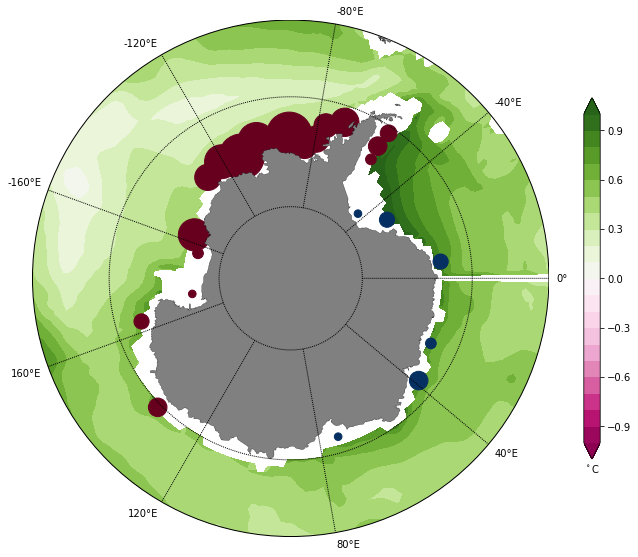

In [21]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

clev = np.arange(-1,1.1,.1)

#plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)

print X.shape
print Y.shape

p1=map.contourf(X,Y,thetao_rcp85_diff_hist[:,:,24], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$^\circ$C')

ice_lon_n,ice_lat_n=np.meshgrid(ice_lon,ice_lat)
X, Y = map(ice_lon_n,ice_lat_n)
ice_data=np.tile(percent,25)
ice_data=np.reshape(ice_data,(25,25))
i=np.identity(25)
ice_data=ice_data*i

#p2=map.scatter(X[22,25], Y[22,25], s=np.abs(percent[19]*115), c=np.sign(percent[19]*115), cmap=plt.cm.RdBu)
p2=map.scatter(X, Y, s=np.abs(ice_data*115), c=np.sign(ice_data*115), cmap=plt.cm.RdBu)

#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')

In [22]:
X
print X.shape
print Y.shape

print X

(25, 25)
(25, 25)
[[-2575267.7695416  -2655878.62302838 -3069737.67849393 -3255333.46670756
  -3457864.74025081 -3656098.61341533 -3716481.86779218 -3835459.78163207
  -4001890.19902275 -4173703.11210909 -4285311.09959757 -4353617.12659934
  -4507022.01065963 -4852981.84172162 -4838876.90575595 -4852981.84172162
  -5094506.49290828 -5293776.8757493  -5502319.05094751 -5372679.0948146
  -5184737.33493104 -4446233.81251818 -2945092.46502668 -2582290.88527021
  -2541907.05025308]
 [-2430880.79174807 -2519561.68595849 -2974852.62419157 -3179028.60978851
  -3401835.51067731 -3619914.79373451 -3686343.08176091 -3817232.00470654
  -4000323.95324223 -4189337.24500564 -4312118.43021077 -4387262.64829638
  -4556025.06311121 -4936619.31131001 -4921102.31477527 -4936619.31131001
  -5202323.25953339 -5421542.81838463 -5650962.37886847 -5508344.02491255
  -5301587.20985553 -4489151.29195696 -2837729.04205337 -2438606.99927493
  -2394180.29435792]
 [-2055555.2630802  -2165213.75753726 -2728204.458872

In [23]:
print cmip_lon
print cmip_lon[25]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [24]:
ice_lon[19:24]

array([  24.9  ,   38.625,   73.325,  135.875,  163.875])

In [25]:
ice_lat[19:24]

array([-68.625, -67.375, -67.175, -64.5  , -68.525])

In [26]:
ice_lat

array([-76.625, -75.3  , -71.875, -71.2  , -71.8  , -70.4  , -77.625,
       -70.125, -70.125, -71.625, -70.4  , -68.35 , -67.2  , -65.875,
       -68.125, -70.125, -77.   , -74.325, -69.125, -68.625, -67.375,
       -67.175, -64.5  , -68.525, -76.125])

In [27]:
ice_lon_n,ice_lat_n=np.meshgrid(ice_lon,ice_lat)
X, Y = map(ice_lon_n,ice_lat_n)
ice_data=np.tile(percent,25)
ice_data=np.reshape(ice_data,(25,25))


In [28]:
print X.shape
print Y.shape
print ice_data.shape
print ice_data[0,0:25]
print ice_data[1,0:25]

ice_data[1:,:]=nan
print ice_data[24,0:25]

(25, 25)
(25, 25)
(25, 25)
[ -1.   -9.   -6.  -10.  -18.  -12.   -9.   -1.  -18.   -5.   -6.   -5.
  -7.   -2.4  -3.   -1.    0.5   2.    2.    1.    3.    0.5  -3.   -2.
  -0.5]
[ -1.   -9.   -6.  -10.  -18.  -12.   -9.   -1.  -18.   -5.   -6.   -5.
  -7.   -2.4  -3.   -1.    0.5   2.    2.    1.    3.    0.5  -3.   -2.
  -0.5]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]


In [29]:
ice_data

array([[ -1. ,  -9. ,  -6. , -10. , -18. , -12. ,  -9. ,  -1. , -18. ,
         -5. ,  -6. ,  -5. ,  -7. ,  -2.4,  -3. ,  -1. ,   0.5,   2. ,
          2. ,   1. ,   3. ,   0.5,  -3. ,  -2. ,  -0.5],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan,   nan,   nan,   nan,   nan,   nan,   nan],


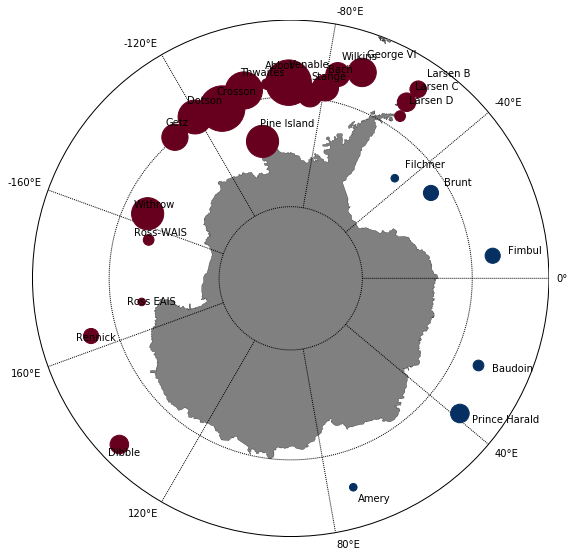

In [30]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

clev = np.arange(-1,1.1,.1)

#plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
## draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
#cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
#X, Y = map(cmip_lon_n,cmip_lat_n)

#print X.shape
#print Y.shape

#p1=map.contourf(X,Y,thetao_rcp85_diff_hist[:,:,24], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('$^\circ$C')

ice_lon_n,ice_lat_n=np.meshgrid(ice_lon,ice_lat)
X, Y = map(ice_lon_n,ice_lat_n)
X2, Y2 = map(ice_lon_n,ice_lat_n+7)
X3, Y3 = map(ice_lon_n,ice_lat_n+9)

ice_data=np.tile(percent,25)
ice_data=np.reshape(ice_data,(25,25))
i=np.identity(25)
ice_data=ice_data*i

#p2=map.scatter(X[22,25], Y[22,25], s=np.abs(percent[19]*115), c=np.sign(percent[19]*115), cmap=plt.cm.RdBu)
p2=map.scatter(X2, Y2, s=np.abs(ice_data*115), c=np.sign(ice_data*115), cmap=plt.cm.RdBu, zorder=10)

for t in range(ice_names.shape[0]):
    #plt.annotate(ice_names[0], xy=(.75, 1), xycoords='axes fraction')
    #plt.annotate(ice_names[t], xy=(X2[t,t],Y2[t,t]), xytext=(X3[t,t],Y3[t,t]),zorder=10,arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate(ice_names[t], xy=(X2[t,t],Y2[t,t]), xytext=(X3[t,t],Y3[t,t]),zorder=10)
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')


In [31]:
ice_names

array(['Ross-WAIS', 'Withrow', 'Getz', 'Dotson', 'Crosson', 'Thwaites',
       'Pine Island', 'Abbot', 'Venable', 'Stange', 'Bach', 'Wilkins',
       'George VI', 'Larsen B', 'Larsen C', 'Larsen D', 'Filchner',
       'Brunt', 'Fimbul', 'Baudoin', 'Prince Harald', 'Amery', 'Dibble',
       'Rennick', 'Ross EAIS'], dtype=object)

In [32]:
ice_lat_n[:,0]

array([-76.625, -75.3  , -71.875, -71.2  , -71.8  , -70.4  , -77.625,
       -70.125, -70.125, -71.625, -70.4  , -68.35 , -67.2  , -65.875,
       -68.125, -70.125, -77.   , -74.325, -69.125, -68.625, -67.375,
       -67.175, -64.5  , -68.525, -76.125])

In [33]:
ice_data=np.tile(percent,25)
ice_data=np.reshape(ice_data,(25,25))
#ice_data[1:,:]=nan

i=np.identity(25)

ice_data=ice_data*i

In [34]:
print ice_data[1,:]
print ice_data[1,1]
print ice_data[3,3]
print ice_data[24,24]


[-0. -9. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.
  0.  0.  0.  0. -0. -0. -0.]
-9.0
-10.0
-0.5


In [35]:
ice_data

array([[ -1. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,
         -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,  -0. ,  -0. ,  -0. ],
       [ -0. ,  -9. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,
         -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,  -0. ,  -0. ,  -0. ],
       [ -0. ,  -0. ,  -6. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,
         -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,  -0. ,  -0. ,  -0. ],
       [ -0. ,  -0. ,  -0. , -10. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,
         -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,  -0. ,  -0. ,  -0. ],
       [ -0. ,  -0. ,  -0. ,  -0. , -18. ,  -0. ,  -0. ,  -0. ,  -0. ,
         -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,  -0. ,  -0. ,  -0. ],


In [36]:
#average across glacier areas ....
ice_x = df['x'].values
ice_y = df['y'].values

#lon is from -180 +180 ... change to 0-360
ice_lon = df['Longitude'].values
ice_lat = df['Latitude'].values
percent = df['PercentChange'].values
ice_names = df['IceShelf'].values
print df


         IceShelf  Longitude  Latitude            x            y  \
0       Ross-WAIS   -164.875   -76.625  -380845.931 -1409033.020   
1         Withrow   -155.700   -75.300  -660750.507 -1463400.157   
2            Getz   -129.375   -71.875 -1534619.427 -1259429.616   
3          Dotson   -120.675   -71.200 -1772142.712 -1051175.765   
4         Crosson   -112.000   -71.800 -1848433.178  -746815.481   
5        Thwaites   -104.000   -70.400 -2085904.713  -520074.456   
6     Pine Island   -101.625   -77.625 -1321930.042  -271954.426   
7           Abbot    -97.000   -70.125 -2164256.535  -265737.288   
8         Venable    -90.600   -70.125 -2180390.165   -22833.827   
9          Stange    -84.000   -71.625 -2002058.722   210424.851   
10           Bach    -79.675   -70.400 -2114950.577   385305.035   
11        Wilkins    -77.000   -68.350 -2318600.020   535290.993   
12      George VI    -70.875   -67.200 -2370679.893   822080.132   
13       Larsen B    -56.000   -65.875 -2204495.

[-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]


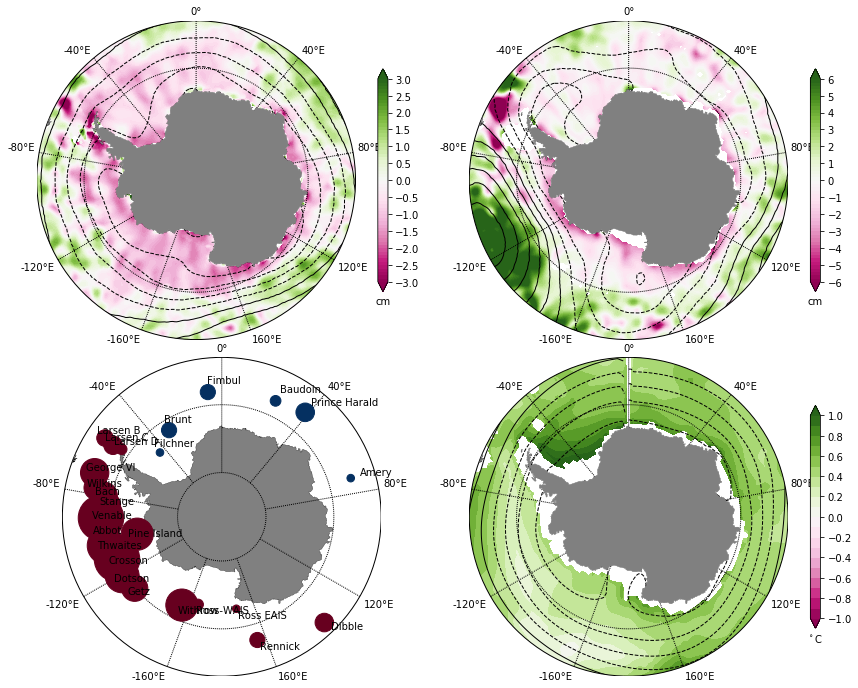

In [37]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

plt.subplot(2,2,1)
#clev = np.arange(-3.1,3.1,.1)
clev = np.linspace(-3,3,61)
#print clev
clev3 = np.linspace(-6,3,10)
#print clev3
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
#map.drawcoastlines(linewidth=0.25)
#map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(lon2d,lat2d)
X.shape
p1=map.contourf(X,Y,sam_sla2d, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm')
ticks=[-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3]
cb.set_ticks(ticks)
map.contour(X,Y,sam_slp2d,levels=clev3,colors='k',linewidths=1)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray',zorder=10)
#plt.title('SAM Anomaly')

plt.subplot(2,2,2)
clev = np.linspace(-6,6,61)
#print clev
clev3 = np.linspace(-10,10,21)
#print clev3
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
#map.drawcoastlines(linewidth=0.25)
#map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(lon2d,lat2d)
X.shape
p1=map.contourf(X,Y,en_sla2d, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm')
ticks=np.linspace(-6,6,13)
print ticks
cb.set_ticks(ticks)
map.contour(X,Y,en_slp2d,levels=clev3,colors='k',linewidths=1)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray',zorder=10)
#plt.title('El Nino Anomaly')

plt.subplot(2,2,4)
clev = np.arange(-1,1.1,.1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
#map.drawcoastlines(linewidth=0.25)
#map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,thetao_rcp85_diff_hist[:,:,24], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$^\circ$C')
ticks=np.linspace(-1,1,11)
print ticks
cb.set_ticks(ticks)
clev3 = np.linspace(-10,10,21)
map.contour(X,Y,slp_rcp85_diff_hist[:,:]/100,levels=clev3,colors='k',linewidths=1)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray',zorder=10)
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('CMIP5 1000 m Temp Anomaly')


plt.subplot(2,2,3)
clev = np.arange(-1,1.1,.1)
#plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
## draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
#cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
#X, Y = map(cmip_lon_n,cmip_lat_n)

#print X.shape
#print Y.shape

#p1=map.contourf(X,Y,thetao_rcp85_diff_hist[:,:,24], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('$^\circ$C')

ice_lon_n,ice_lat_n=np.meshgrid(ice_lon,ice_lat)
X, Y = map(ice_lon_n,ice_lat_n)
X2, Y2 = map(ice_lon_n,ice_lat_n+7)
X3, Y3 = map(ice_lon_n,ice_lat_n+9)

ice_data=np.tile(percent,25)
ice_data=np.reshape(ice_data,(25,25))
i=np.identity(25)
ice_data=ice_data*i

#p2=map.scatter(X[22,25], Y[22,25], s=np.abs(percent[19]*115), c=np.sign(percent[19]*115), cmap=plt.cm.RdBu)
p2=map.scatter(X2, Y2, s=np.abs(ice_data*115), c=np.sign(ice_data*115), cmap=plt.cm.RdBu, zorder=10)

for t in range(ice_names.shape[0]):
    #plt.annotate(ice_names[0], xy=(.75, 1), xycoords='axes fraction')
    #plt.annotate(ice_names[t], xy=(X2[t,t],Y2[t,t]), xytext=(X3[t,t],Y3[t,t]),zorder=10,arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate(ice_names[t], xy=(X2[t,t],Y2[t,t]), xytext=(X3[t,t],Y3[t,t]),zorder=10)
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('Control Zonal Wind Stress')


plt.tight_layout()

of = os.path.join('/g/data1a/v45/pas561/ASF_review_fig/','section4_fig.png')
plt.savefig(of,dpi=220)

In [38]:
print df.shape
df_short=np.zeros((15,3))
print df_short.shape


#Ross
print df['IceShelf'].values[0],df['IceShelf'].values[1],df['IceShelf'].values[24]
print (df['PercentChange'].values[0]+df['PercentChange'].values[1]+df['PercentChange'].values[24])/3
print (df['Longitude'].values[0]+df['Longitude'].values[1])/2#+df['Longitude'].values[24])/3
print (df['Latitude'].values[0]+df['Latitude'].values[1])/3#+df['Latitude'].values[24])/3

df_short[0,0]=(df['Longitude'].values[0]+df['Longitude'].values[1])/2#+df['Longitude'].values[24])/3
df_short[0,1]=(df['Latitude'].values[0]+df['Latitude'].values[1])/2#+df['Latitude'].values[24])/3
df_short[0,2]=(df['PercentChange'].values[0]+df['PercentChange'].values[1]+df['PercentChange'].values[24])/3


#Amundsen
print df['IceShelf'].values[2:7]
print np.mean(df['PercentChange'].values[2:7])
print np.mean(df['Longitude'].values[2:7])
print np.mean(df['Latitude'].values[2:7])

df_short[1,0]=np.mean(df['Longitude'].values[2:7])
df_short[1,1]=np.mean(df['Latitude'].values[2:7])
df_short[1,2]=np.mean(df['PercentChange'].values[2:7])

#Bellingshausen
print df['IceShelf'].values[7:10]
print np.mean(df['PercentChange'].values[7:10])
print np.mean(df['Longitude'].values[7:10])
print np.mean(df['Latitude'].values[7:10])

df_short[2,0]=np.mean(df['Longitude'].values[7:10])
df_short[2,1]=np.mean(df['Latitude'].values[7:10])
df_short[2,2]=np.mean(df['PercentChange'].values[7:10])


#WAP
print df['IceShelf'].values[10:13]
print np.mean(df['PercentChange'].values[10:13])
print np.mean(df['Longitude'].values[10:13])
print np.mean(df['Latitude'].values[10:13])

df_short[3,0]=np.mean(df['Longitude'].values[10:13])
df_short[3,1]=np.mean(df['Latitude'].values[10:13])
df_short[3,2]=np.mean(df['PercentChange'].values[10:13])


#Larsen
print df['IceShelf'].values[13:16]
print np.mean(df['PercentChange'].values[13:16])
print np.mean(df['Longitude'].values[13:16])
print np.mean(df['Latitude'].values[13:16])

df_short[4,0]=np.mean(df['Longitude'].values[13:16])
df_short[4,1]=np.mean(df['Latitude'].values[13:16])
df_short[4,2]=np.mean(df['PercentChange'].values[13:16])

#16-23 ... all the others= 8+5=13 shelf areas in total
df_short[5:13,0]=df['Longitude'].values[16:24]
df_short[5:13,1]=df['Latitude'].values[16:24]
df_short[5:13,2]=df['PercentChange'].values[16:24]

#14-15 loss gain labelsdf_short[5:13,0]=df['Longitude'].values[16:24]
df_short[13,0]=-0
#df_short[13,1]=-65
df_short[13,1]=-90
df_short[13,2]=-4.9

df_short[14,0]=-180
df_short[14,1]=-90
df_short[14,2]=4.9




(25, 6)
(15, 3)
Ross-WAIS Withrow Ross EAIS
-3.5
-160.2875
-50.6416666667
['Getz' 'Dotson' 'Crosson' 'Thwaites' 'Pine Island']
-11.0
-113.535
-72.58
['Abbot' 'Venable' 'Stange']
-8.0
-90.5333333333
-70.625
['Bach' 'Wilkins' 'George VI']
-6.0
-75.85
-68.65
['Larsen B' 'Larsen C' 'Larsen D']
-2.13333333333
-56.2166666667
-68.0416666667


In [39]:
df_short_names=['Ross','Amund.','Belling.','WAP','Larsen',df['IceShelf'].values[16],df['IceShelf'].values[17],df['IceShelf'].values[18],df['IceShelf'].values[19],df['IceShelf'].values[20],df['IceShelf'].values[21],df['IceShelf'].values[22],df['IceShelf'].values[23],'loss 5%','gain 5%']
print len(df_short_names)
print df_short_names

df_short_names_lon = np.copy(df_short[:,0])
df_short_names_lat = np.copy(df_short[:,1])
print df_short_names_lat[0]
df_short_names_lat[0]=df_short_names_lat[0]+3
df_short_names_lon[1]=df_short_names_lon[1]-3.5
df_short_names_lat[1]=df_short_names_lat[1]+8
df_short_names_lon[2]=df_short_names_lon[2]+4.5
df_short_names_lat[2]=df_short_names_lat[2]+8
df_short_names_lon[3]=df_short_names_lon[3]+4
df_short_names_lat[3]=df_short_names_lat[3]+3
df_short_names_lon[4]=df_short_names_lon[4]+2
df_short_names_lat[4]=df_short_names_lat[4]+1
#df_short_names_lon[13]=df_short_names_lon[13]+2

#df_short_names_lat[13]=df_short_names_lat[13]-8
df_short_names_lat[13]=df_short_names_lat[13]+1

#df_short_names_lon[14]=df_short_names_lon[14]+15
#df_short_names_lat[14]=df_short_names_lat[14]+2
df_short_names_lat[14]=df_short_names_lat[14]-6


#df_short_names_lat[3]=df_short_names_lat[3]+11
#df_short_names_lat[0]
#df_short_names_lat[11]=df_short_names_lat[11]+1
#df_short_names_lon[12]=df_short_names_lon[12]
#df_short_names_lat[12]=df_short_names_lat[12]+1

#print df_short_names_lat
#print df_short_names_lon
#print df_short_names_lon.shape
#print df_short_names_lat.shape

15
['Ross', 'Amund.', 'Belling.', 'WAP', 'Larsen', 'Filchner', 'Brunt', 'Fimbul', 'Baudoin', 'Prince Harald', 'Amery', 'Dibble', 'Rennick', 'loss 5%', 'gain 5%']
-75.9625


In [40]:
#calc areas of each spot, and scale the %circles by the area.
print df_short_names_lat
print df_short_names_lon
print df_short[:,2]

#test WAP at 5% size (should be -6)
print df_short[3,2]
df_short[3,2]=-6
print df_short[3,2]
#df_area=np.zeros((15,1))




[-72.9625     -64.58       -62.625      -65.65       -67.04166667 -77.
 -74.325      -69.125      -68.625      -67.375      -67.175      -64.5
 -68.525      -89.         -96.        ]
[-160.2875     -117.035       -86.03333333  -71.85        -54.21666667
  -43.875       -31.325        -6.375        24.9          38.625        73.325
  135.875       163.875         0.         -180.        ]
[ -3.5        -11.          -8.          -6.          -2.13333333   0.5
   2.           2.           1.           3.           0.5         -3.          -2.
  -4.9          4.9       ]
-6.0
-6.0


Text(0.5,0.5,'matplotlib')

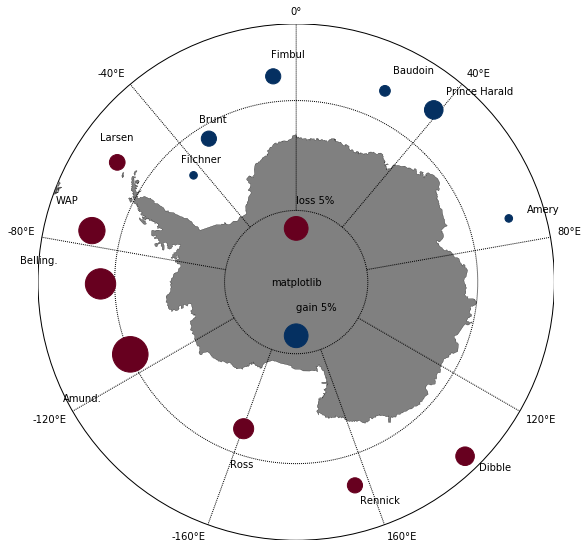

In [41]:
ax=plt.subplot(1,1,1)
clev = np.arange(-1,1.1,.1)
#plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
## draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
#cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
#X, Y = map(cmip_lon_n,cmip_lat_n)

#print X.shape
#print Y.shape

#p1=map.contourf(X,Y,thetao_rcp85_diff_hist[:,:,24], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
#cb=plt.colorbar(orientation='vertical',shrink = 0.7)
#cb.ax.set_xlabel('$^\circ$C')

ice_lon_n,ice_lat_n=np.meshgrid(df_short[:,0],df_short[:,1])
X, Y = map(ice_lon_n,ice_lat_n)
X2, Y2 = map(ice_lon_n,ice_lat_n+7.5)

ice_lon_n2,ice_lat_n2=np.meshgrid(df_short_names_lon,df_short_names_lat)
X3, Y3 = map(ice_lon_n2,ice_lat_n2+10)

ice_data=np.tile(df_short[:,2],15)
ice_data=np.reshape(ice_data,(15,15))
i=np.identity(15)
ice_data=ice_data*i

#p2=map.scatter(X[22,25], Y[22,25], s=np.abs(percent[19]*115), c=np.sign(percent[19]*115), cmap=plt.cm.RdBu)
p2=map.scatter(X2, Y2, s=np.abs(ice_data*115), c=np.sign(ice_data*115), cmap=plt.cm.RdBu, zorder=10)

for t in range(len(df_short_names)):
    #plt.annotate(ice_names[0], xy=(.75, 1), xycoords='axes fraction')
    #plt.annotate(ice_names[t], xy=(X2[t,t],Y2[t,t]), xytext=(X3[t,t],Y3[t,t]),zorder=10,arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate(df_short_names[t], xy=(X2[t,t],Y2[t,t]), xytext=(X3[t,t],Y3[t,t]),zorder=10)
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.text(0,0,'Control Zonal Wind Stress')
#plt.text('Control Zonal Wind Stress',
#         horizontalalignment='center')#,
         #fontsize=20,
         #transform = ax2.transAxes)
text(0.5, 0.5, 'matplotlib', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)




In [42]:
schm = sp.io.loadmat('/g/data1/v45/pas561/ASF_review_fig/schmidtko_2d.mat')#,'bat_lat')
schm_lat2d=schm['lon2d']

here [-5. -4. -3. -2. -1.  0.  1.  2.]
[-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]
here2 [-4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]
[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
here3 [-4. -3. -2. -1.  0.  1.  2.  3.]
[-30. -20. -10.   0.  10.  20.  30.]


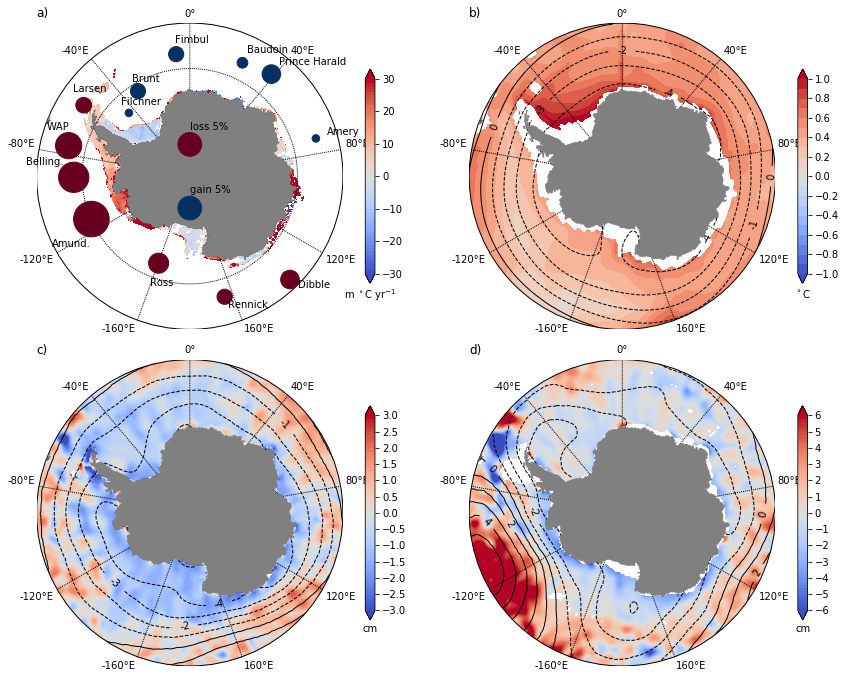

In [156]:
plt.figure(figsize(12.5,9.5))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
#plt.suptitle('Wind Stress')

ax=plt.subplot(2,2,3)
#clev = np.arange(-3.1,3.1,.1)
clev = np.linspace(-3,3,61)
#print clev
clev3 = np.linspace(-6,3,10)

map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
#map.drawcoastlines(linewidth=0.25)
#map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(lon2d,lat2d)
X.shape
p1=map.contourf(X,Y,sam_sla2d, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm')
ticks=[-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3]
cb.set_ticks(ticks)

cs=map.contour(X,Y,sam_slp2d,levels=clev3,colors='k',linewidths=1)
print 'here', cs.levels
plt.clabel(cs,cs.levels[0:5], fmt="%1.0f", fontsize=10)

map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray',zorder=10)
#plt.title('SAM Anomaly')\tilde{n}
#plt.title('a) El Nino SSH and SLP', loc='left')
#text(0.5, 1.10, 'a) El Nino SSH and SLP', fontsize=14,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.title('c)',loc='left')

ax=plt.subplot(2,2,4)
clev = np.linspace(-6,6,61)
#print clev
clev3 = np.linspace(-10,10,21)
#print clev3
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
#map.drawcoastlines(linewidth=0.25)
#map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(lon2d,lat2d)
X.shape
p1=map.contourf(X,Y,en_sla2d, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm')
ticks=np.linspace(-6,6,13)
print ticks
cb.set_ticks(ticks)
cs=map.contour(X,Y,en_slp2d,levels=clev3,colors='k',linewidths=1)
print 'here2', cs.levels
plt.clabel(cs,cs.levels[::2], fmt="%1.0f", fontsize=10)

map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray',zorder=10)
#plt.title('El Nino Anomaly')
#plt.title('b)+SAM SSH and SLP')
plt.title('d)',loc='left')
#text(0.5, 1.10, 'b) +SAM SSH and SLP', fontsize=14,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax=plt.subplot(2,2,2)
clev = np.arange(-1,1.1,.1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
#map.drawcoastlines(linewidth=0.25)
#map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon_2,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,thetao_rcp85_diff_hist_2[:,:,24], cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$^\circ$C')
ticks=np.linspace(-1,1,11)
print ticks
cb.set_ticks(ticks)
clev3 = np.linspace(-10,10,21)
cs=map.contour(X,Y,slp_rcp85_diff_hist_2[:,:]/100,levels=clev3,colors='k',linewidths=1)
print 'here3', cs.levels
plt.clabel(cs,cs.levels[0:5], fmt="%1.0f", fontsize=10)

map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray',zorder=10)
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('CMIP5 1000 m Temp Anomaly')
#plt.title('d) RCP8.5 1000m temperature and SLP anomaly')
plt.title('b)',loc='left')
#text(0.5, 1.10, 'd) RCP8.5 1000m temperature and SLP anomaly', fontsize=14,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

ax=plt.subplot(2,2,1)
clev = np.arange(-1,1.1,.1)
#plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
## draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
#cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon,cmip_lat)
#X, Y = map(cmip_lon_n,cmip_lat_n)

clev = np.linspace(-30,30,61)
X, Y = map(schm['lon2d'],schm['lat2d'])
X.shape
p1=map.contourf(X,Y,schm['bat_tetr_gt_tetrerr_2d']*1000, cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('m $^\circ$C yr$^{-1}$')
ticks=np.linspace(-30,30,7)
print ticks
cb.set_ticks(ticks)

#cb.ax.set_xlabel('$m ^\circ$C yr^{-1}')

ice_lon_n,ice_lat_n=np.meshgrid(df_short[:,0],df_short[:,1])
X, Y = map(ice_lon_n,ice_lat_n)
X2, Y2 = map(ice_lon_n,ice_lat_n+7.5)

ice_lon_n2,ice_lat_n2=np.meshgrid(df_short_names_lon,df_short_names_lat)
X3, Y3 = map(ice_lon_n2,ice_lat_n2+10)

ice_data=np.tile(df_short[:,2],15)
ice_data=np.reshape(ice_data,(15,15))
i=np.identity(15)
ice_data=ice_data*i

#p2=map.scatter(X[22,25], Y[22,25], s=np.abs(percent[19]*115), c=np.sign(percent[19]*115), cmap=plt.cm.RdBu)
map.fillcontinents(color='gray',lake_color='gray',zorder=5)
p2=map.scatter(X2, Y2, s=np.abs(ice_data*115), c=np.sign(ice_data*115), cmap=plt.cm.RdBu, zorder=10)

for t in range(len(df_short_names)):
    #plt.annotate(ice_names[0], xy=(.75, 1), xycoords='axes fraction')
    #plt.annotate(ice_names[t], xy=(X2[t,t],Y2[t,t]), xytext=(X3[t,t],Y3[t,t]),zorder=10,arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate(df_short_names[t], xy=(X2[t,t],Y2[t,t]), xytext=(X3[t,t],Y3[t,t]),zorder=10)
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
plt.title('a)',loc='left')
#text(0.5, 1.10, 'c) Recent ice-shelf thickness and ASBW trends', fontsize=14,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

plt.tight_layout()

of = os.path.join('/g/data1a/v45/pas561/ASF_review_fig/','asf_climate_fig.png')
plt.savefig(of,dpi=220)

In [44]:
#bat_de               1x27188            217504  double              
#  bat_lat          27188x1                217504  double              
#  bat_lon          27188x1                217504  double              
#  bat_sa               1x27188            217504  double              
#  bat_saerr            1x27188            217504  double              
#  bat_satr             1x27188            217504  double              
#  bat_satrerr          1x27188            217504  double              
#  bat_te               1x27188            217504  double              
#  bat_teerr            1x27188            217504  double              
#  bat_tetr             1x27188            217504  double              
#  bat_tetrerr          1x27188            217504  double        

In [45]:
#schm = sp.io.loadmat('/g/data1/v45/pas561/ASF_review_fig/trends_on_shelf.mat')#,'bat_lat')
#bat_lat=schm['bat_lat']

#save schmidtko_2d.mat bat_te_2d bat_teerr_2d bat_tetr_2d bat_tetrerr_2d bat_tetr_gt_tetrerr_2d lat2d lon2d


schm = sp.io.loadmat('/g/data1/v45/pas561/ASF_review_fig/schmidtko_2d.mat')#,'bat_lat')
schm_lat2d=schm['lon2d']
print 

[-45. -30. -15.   0.  15.  30.  45.]


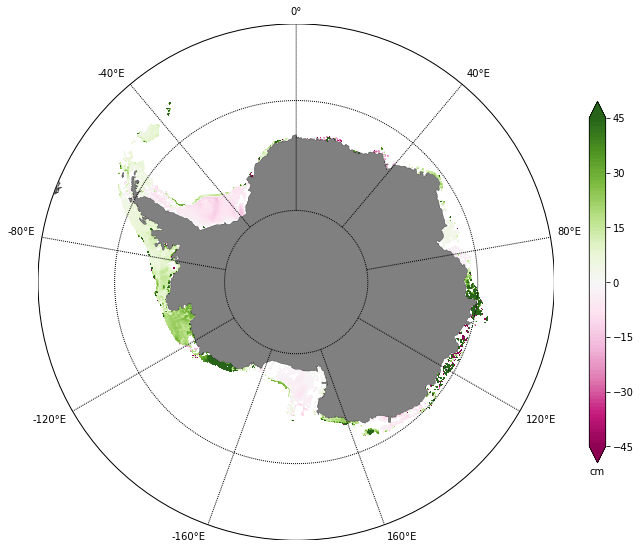

In [46]:
ax=plt.subplot(1,1,1)
#plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
## draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])

clev = np.linspace(-45,45,91)
X, Y = map(schm['lon2d'],schm['lat2d'])
X.shape
p1=map.contourf(X,Y,schm['bat_tetr_gt_tetrerr_2d']*1000, cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm')
ticks=np.linspace(-45,45,7)
print ticks
cb.set_ticks(ticks)




[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6
 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
[-2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8
  1.   1.2  1.4  1.6  1.8  2. ]
[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6
 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
[-2.  -1.6 -1.2 -0.8 -0.4  0.   0.4  0.8  1.2  1.6  2. ]


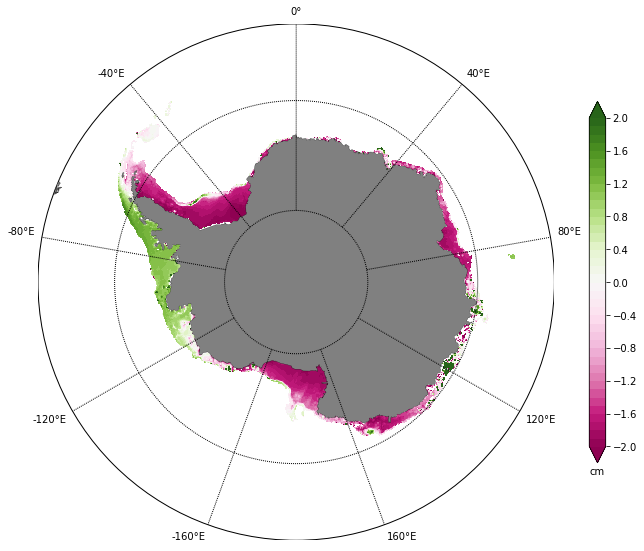

In [47]:
ax=plt.subplot(1,1,1)
#plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
## draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])

clev = np.linspace(-2,2,41)
print clev
ticks=np.linspace(-2,2,21)
print ticks

clev = np.linspace(-2,2,41)
print clev
ticks=np.linspace(-2,2,11)
print ticks


X, Y = map(schm['lon2d'],schm['lat2d'])
X.shape
p1=map.contourf(X,Y,schm['bat_te_2d'], cmap=plt.cm.PiYG, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm')
cb.set_ticks(ticks)


[-45. -30. -15.   0.  15.  30.  45.]


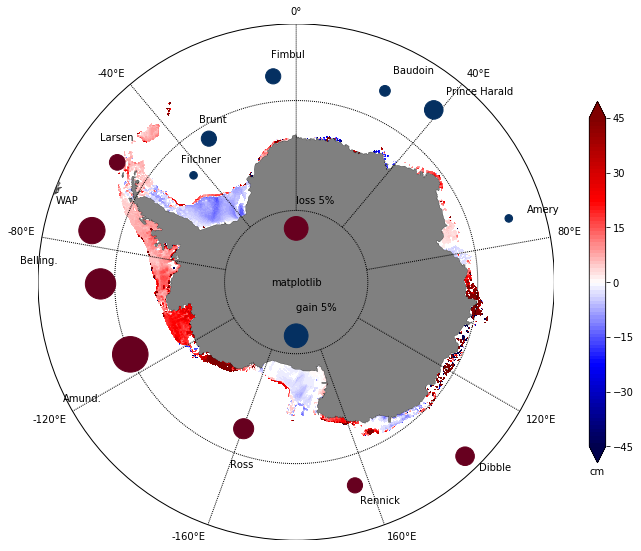

In [48]:
ax=plt.subplot(1,1,1)
#plt.subplot(3,1,3)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])

clev = np.linspace(-45,45,91)
X, Y = map(schm['lon2d'],schm['lat2d'])
X.shape
p1=map.contourf(X,Y,schm['bat_tetr_gt_tetrerr_2d']*1000, cmap=plt.cm.seismic, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('cm')
ticks=np.linspace(-45,45,7)
print ticks
cb.set_ticks(ticks)


ice_lon_n,ice_lat_n=np.meshgrid(df_short[:,0],df_short[:,1])
X, Y = map(ice_lon_n,ice_lat_n)
X2, Y2 = map(ice_lon_n,ice_lat_n+7.5)

ice_lon_n2,ice_lat_n2=np.meshgrid(df_short_names_lon,df_short_names_lat)
X3, Y3 = map(ice_lon_n2,ice_lat_n2+10)

ice_data=np.tile(df_short[:,2],15)
ice_data=np.reshape(ice_data,(15,15))
i=np.identity(15)
ice_data=ice_data*i

#p2=map.scatter(X[22,25], Y[22,25], s=np.abs(percent[19]*115), c=np.sign(percent[19]*115), cmap=plt.cm.RdBu)
p2=map.scatter(X2, Y2, s=np.abs(ice_data*115), c=np.sign(ice_data*115), cmap=plt.cm.RdBu, zorder=10)

for t in range(len(df_short_names)):
    #plt.annotate(ice_names[0], xy=(.75, 1), xycoords='axes fraction')
    #plt.annotate(ice_names[t], xy=(X2[t,t],Y2[t,t]), xytext=(X3[t,t],Y3[t,t]),zorder=10,arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate(df_short_names[t], xy=(X2[t,t],Y2[t,t]), xytext=(X3[t,t],Y3[t,t]),zorder=10)
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.text(0,0,'Control Zonal Wind Stress')
#plt.text('Control Zonal Wind Stress',
#         horizontalalignment='center')#,
         #fontsize=20,
         #transform = ax2.transAxes)
text(0.5, 0.5, 'matplotlib', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

of = os.path.join('/g/data1a/v45/pas561/ASF_review_fig/','asf_7a_fig.png')

[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
here3 [-4. -3. -2. -1.  0.  1.  2.  3.]


Text(0,1,'b)')

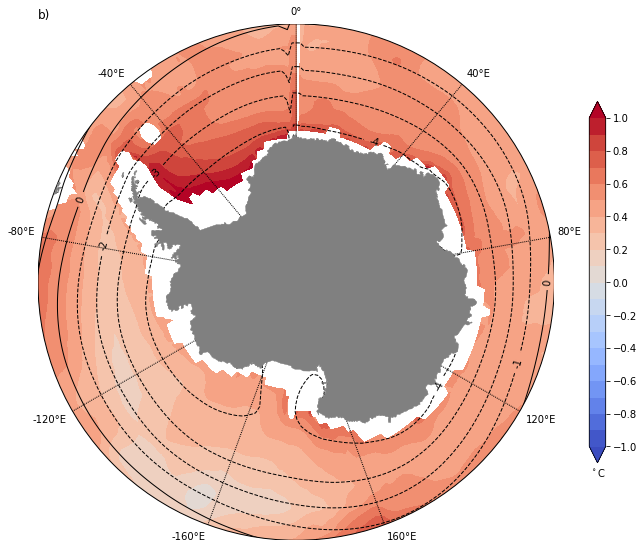

In [132]:
thetao_rcp85_diff_hist[:,0,24]=thetao_rcp85_diff_hist[:,-1,24]
slp_rcp85_diff_hist[:,-1]=slp_rcp85_diff_hist[:,0]


ax=plt.subplot(1,1,1)
clev = np.arange(-1,1.1,.1)
map = Basemap(projection='spstere',boundinglat=-55,lon_0=180,resolution='l',round=True)
#map.drawcoastlines(linewidth=0.25)
#map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
#map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
cmip_lon_n,cmip_lat_n=np.meshgrid(cmip_lon_2,cmip_lat)
X, Y = map(cmip_lon_n,cmip_lat_n)
X.shape
p1=map.contourf(X,Y,thetao_rcp85_diff_hist_2[:,:,24], cmap=plt.cm.coolwarm, levels=clev, extend='both') #CMRmap_r, gist_stern_r
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('$^\circ$C')
ticks=np.linspace(-1,1,11)
print ticks
cb.set_ticks(ticks)
clev3 = np.linspace(-10,10,21)
cs=map.contour(X,Y,slp_rcp85_diff_hist_2[:,:]/100,levels=clev3,colors='k',linewidths=1)
print 'here3', cs.levels
plt.clabel(cs,cs.levels[0:5], fmt="%1.0f", fontsize=10)

map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray',zorder=10)
#clev3 = np.arange(0,5000,1000)
#map.contour(X,Y,ht,levels=clev3,colors='k',linewidths=1)
#plt.title('CMIP5 1000 m Temp Anomaly')
#plt.title('d) RCP8.5 1000m temperature and SLP anomaly')
plt.title('b)',loc='left')
#text(0.5, 1.10, 'd) RCP8.5 1000m temperature and SLP anomaly', fontsize=14,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)


In [64]:
print cmip_lon_n.shape
print cmip_lon_n[:,0]
print cmip_lon_n[:,-1]


(60, 360)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[359 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359
 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359
 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359 359
 359 359 359 359 359 359]


In [75]:
print cmip_lat_n.shape
print cmip_lat_n[:,0]
print cmip_lat_n[:,-1]

(60, 360)
[-90 -89 -88 -87 -86 -85 -84 -83 -82 -81 -80 -79 -78 -77 -76 -75 -74 -73
 -72 -71 -70 -69 -68 -67 -66 -65 -64 -63 -62 -61 -60 -59 -58 -57 -56 -55
 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37
 -36 -35 -34 -33 -32 -31]
[-90 -89 -88 -87 -86 -85 -84 -83 -82 -81 -80 -79 -78 -77 -76 -75 -74 -73
 -72 -71 -70 -69 -68 -67 -66 -65 -64 -63 -62 -61 -60 -59 -58 -57 -56 -55
 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37
 -36 -35 -34 -33 -32 -31]


In [77]:
print slp_rcp85_diff_hist[:,0]
print slp_rcp85_diff_hist[:,-1]


[          nan -424.70754221 -402.49051935 -398.77838282 -399.76527302
 -400.175515   -398.31657749 -395.96837547 -392.33381229 -385.88737395
 -381.02960545 -378.67089968 -376.25399285 -372.90314762 -367.2026986
 -363.58619616 -360.81773271 -374.67166057 -397.73123206 -411.14290863
 -416.18622381 -410.5752509  -395.97600443 -374.42511376 -351.10071876
 -326.56543859 -300.46869576 -273.79308853 -244.98509604 -214.85097614
 -184.36708704 -152.00838577 -118.91437705  -85.51669844  -51.89662285
  -19.21715823   10.96920337   38.55255858   63.73224792   84.80108215
  102.46510134  116.97911934  126.91785647  133.90964004  138.70360303
  140.1877561   140.3893952   138.55173587  134.9022148   129.46758758
  122.20789744  113.68292282  104.40538036   93.86823157   82.57295238
   71.04625553   58.98899981   47.36809002   37.909505             nan]
[ nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  

In [70]:
print cmip_lon
print cmip_lat
print 't1', thetao_rcp85_diff_hist[:,0,24]
print 't2', thetao_rcp85_diff_hist[:,-1,24]
thetao_rcp85_diff_hist[:,0,24]=thetao_rcp85_diff_hist[:,-1,24]
print 't1', thetao_rcp85_diff_hist[:,0,24]


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [56]:
thetao_rcp85_diff_hist[:,-1,24]

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  0.88646984,  0.78901283,  0.73107149,  0.70920683,
        0.72572213,  0.71334964,  0.67011131,  0.61376971,  0.58925453,
        0.56133159,  0.55473535,  0.58318789,  0.52573687,  0.47530259,
        0.43251483,  0.41451078,  0.3997857 ,  0.364961  ,  0.35237511,
        0.37086461,  0.45359587,  0.55495599,  0.66403911,  0.77519603,
        0.90762598,  1.03671965,  1.06553828,  1.15104463,  1.23723951,
        1.23017985,  1.16027351,  1.07194463,  0.95641161,  0.84539346,
        0.76667851,  0.71321432,  0.68782696,  0.68246734,         nan])

In [60]:
print lon2d.shape
print lon2d[0,:]
print lon2d[:,0]

(215, 205)
[-38.0133   -37.7014   -37.3868   -37.0695   -36.7496   -36.427    -36.1017
 -35.7737   -35.4429   -35.1094   -34.7731   -34.4341   -34.0923   -33.7478
 -33.4004   -33.0502   -32.6973   -32.3415   -31.9829   -31.6215   -31.2572
 -30.8901   -30.5202   -30.1474   -29.7718   -29.3934   -29.0121   -28.628
 -28.241    -27.8513   -27.4587   -27.0633   -26.665    -26.264    -25.8602
 -25.4536   -25.0443   -24.6322   -24.2173   -23.7998   -23.3795   -22.9566
 -22.531    -22.1027   -21.6719   -21.2384   -20.8024   -20.3639   -19.9228
 -19.4793   -19.0333   -18.5849   -18.1342   -17.6811   -17.2257   -16.7681
 -16.3082   -15.8462   -15.3821   -14.9158   -14.4476   -13.9774   -13.5052
 -13.0312   -12.5553   -12.0777   -11.5983   -11.1173   -10.6348   -10.1506
  -9.66507   -9.17808   -8.68975   -8.20015   -7.70933   -7.21738   -6.72435
  -6.23032   -5.73536   -5.23954   -4.74293   -4.24561   -3.74764   -3.24911
  -2.75009   -2.25064   -1.75085   -1.2508    -0.750557  -0.250198
   0.2501

In [61]:
print lat2d.shape
print lat2d[0,:]
print lat2d[:,0]

(215, 205)
[-29.1417 -29.3543 -29.5659 -29.7764 -29.9858 -30.1941 -30.4012 -30.6071
 -30.8118 -31.0152 -31.2173 -31.4181 -31.6176 -31.8156 -32.0123 -32.2075
 -32.4013 -32.5935 -32.7842 -32.9733 -33.1608 -33.3466 -33.5308 -33.7133
 -33.8941 -34.073  -34.2502 -34.4255 -34.5989 -34.7705 -34.94   -35.1076
 -35.2732 -35.4368 -35.5982 -35.7576 -35.9148 -36.0698 -36.2226 -36.3732
 -36.5214 -36.6674 -36.811  -36.9522 -37.091  -37.2273 -37.3612 -37.4925
 -37.6213 -37.7475 -37.8711 -37.9921 -38.1104 -38.226  -38.3388 -38.4489
 -38.5562 -38.6607 -38.7623 -38.8611 -38.957  -39.0499 -39.1399 -39.2269
 -39.3108 -39.3918 -39.4697 -39.5446 -39.6163 -39.685  -39.7505 -39.8128
 -39.872  -39.928  -39.9808 -40.0303 -40.0766 -40.1197 -40.1595 -40.1961
 -40.2293 -40.2593 -40.2859 -40.3092 -40.3293 -40.346  -40.3593 -40.3693
 -40.376  -40.3794 -40.3794 -40.376  -40.3693 -40.3593 -40.346  -40.3293
 -40.3092 -40.2859 -40.2593 -40.2293 -40.1961 -40.1595 -40.1197 -40.0766
 -40.0303 -39.9808 -39.928  -39.872  -39